
<h1>Перекрестная проверка</h1>

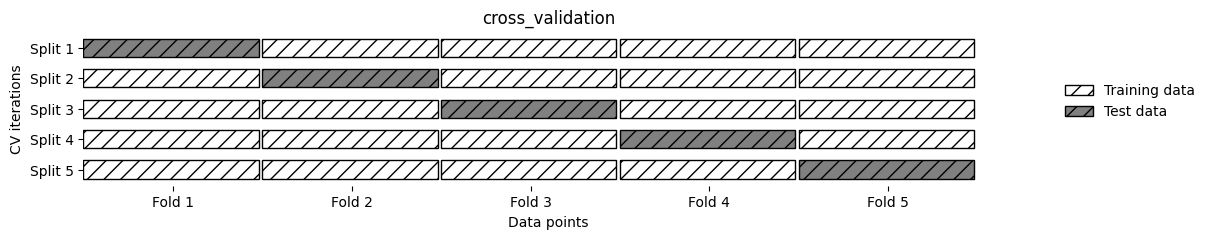

In [74]:
import mglearn
import numpy as np
import pandas as pd

mglearn.plots.plot_cross_validation()

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

digits = load_digits()
logreg = LogisticRegression(max_iter=10000)
scores = cross_val_score(logreg, digits.data, digits.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.925      0.875      0.93871866 0.93314763 0.89693593]


In [76]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.91


In [77]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, digits.data, digits.target, cv=5)
display(res)

{'fit_time': array([2.97089815, 2.58356094, 2.33027101, 1.59747696, 1.74471712]),
 'score_time': array([0.00173497, 0.00099921, 0.00033689, 0.00035715, 0.00036287]),
 'test_score': array([0.925     , 0.875     , 0.93871866, 0.93314763, 0.89693593])}

In [78]:
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score
0,2.970898,0.001735,0.925000
1,2.583561,0.000999,0.875000
2,2.330271,0.000337,0.938719
3,1.597477,0.000357,0.933148
4,1.744717,0.000363,0.896936


Mean times and scores:
 fit_time      2.245385
score_time    0.000758
test_score    0.913760
dtype: float64


<h1>Стратифицированная k-блочная перекрестная проверка и другие стратегии</h1>

In [79]:
from sklearn.datasets import load_digits
digits = load_digits()
print ("Метки чисел:\n{}".format(digits.target))

Метки чисел:
[0 1 2 ... 8 9 8]


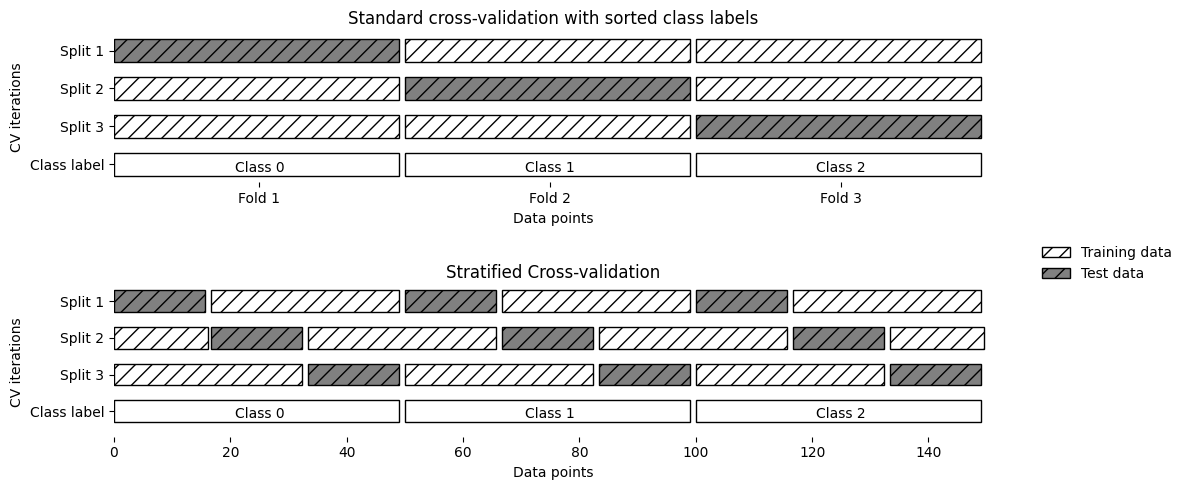

In [80]:
mglearn.plots.plot_stratified_cross_validation()

In [81]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, digits.data, digits.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0.93055556 0.875      0.94150418 0.93871866 0.89972145]


In [82]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, digits.data, digits.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0.95659432 0.95993322 0.96828047]


In [83]:
kfold = KFold(n_splits=3)
print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, digits.data, digits.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0.92821369 0.94156928 0.91652755]


In [84]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, digits.data, digits.target, cv=kfold)))


Значения правильности перекрестной проверки:
[0.95659432 0.95993322 0.96828047]


<h1>Перекрестная проверка с исключением по одному</h1>

In [85]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, digits.data, digits.target, cv=loo)
print("Kolichestvo iteraciy:", len(scores))
print("Srednyaia pravilnost: {:.2f}".format(scores.mean()))

KeyboardInterrupt: 

<h1>Перекрестная проверка со случайными перестановками при разбиении</h1>

In [ ]:
import mglearn
mglearn.plots.plot_shuffle_split()

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
shuffleSplit = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, digits.data, digits.target, cv=shuffleSplit)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

<h1>Простой решетчатый поиск</h1>

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test= train_test_split(digits.data, digits.target, random_state=0)
print("Размер обучающего набора: {} размер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 1001]:
# for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm. fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm. score(X_test, y_test)
    # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшие значения параметров: {}".format(best_parameters))

In [ ]:
import mglearn
mglearn.plots.plot_threefold_split()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
X_trainval, X_test, y_trainval, y_test = train_test_split(digits.data, digits.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_valid, y_valid)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате объединения обучающих
# и проверочных данных, оцениваем качество модели на тестовом наборе
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе:{:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами:{:.2f}".format(test_score))

In [ ]:
mglearn.plots.plot_cross_val_selection()

In [ ]:
mglearn.plots.plot_grid_search_overview()

In [ ]:
param_grid={'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print('Setka parametrov', param_grid)

<h1>Решетчатый поиск с перекрестной проверкой</h1>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
grid_search.fit(X_train, y_train)
print("Правильность на тестовом наборе:", grid_search.score(X_test, y_test))

In [ ]:
print('Наилучшие значение параметров:', grid_search.best_params_)
print('Наилучшее значение кросс валид. правильности:', grid_search.best_score_)

In [ ]:
print('Наилучшая модель:', grid_search.best_estimator_)

<h1>Анализ результатов перекрестной проверки</h1>

In [ ]:
import pandas as pd

results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

scores = np.array(results.mean_test_score).reshape(6,6)

ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='hsv')
ax.set(xlabel="gamma", ylabel="C")
ax.xaxis.tick_top()
plt.show()

<h1>Несбалансированный набор ошибок</h1>

In [95]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [96]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки:", np.unique(pred_most_frequent))
print('Правильность на тестовом наборе', dummy_majority.score(X_test, y_test))

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе 0.8955555555555555


In [105]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print('Правильность на тестовом наборе',tree.score(X_test, y_test))

Правильность на тестовом наборе 0.31777777777777777


<h1>Сравнение двух классификаторов LogisticRegression и DummyClassifier</h1>

In [104]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("Pravilnost` dummy:", dummy.score(X_test, y_test))
logreg = LogisticRegression(C=0.1, max_iter=2000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("Pravilnost` logreg:", logreg.score(X_test, y_test))

Pravilnost` dummy: 0.08444444444444445
Pravilnost` logreg: 0.9555555555555556


<h1>Матрица ошибок</h1>

In [98]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Conf matrix:\n", confusion)

Conf matrix:
 [[402   1]
 [  6  41]]


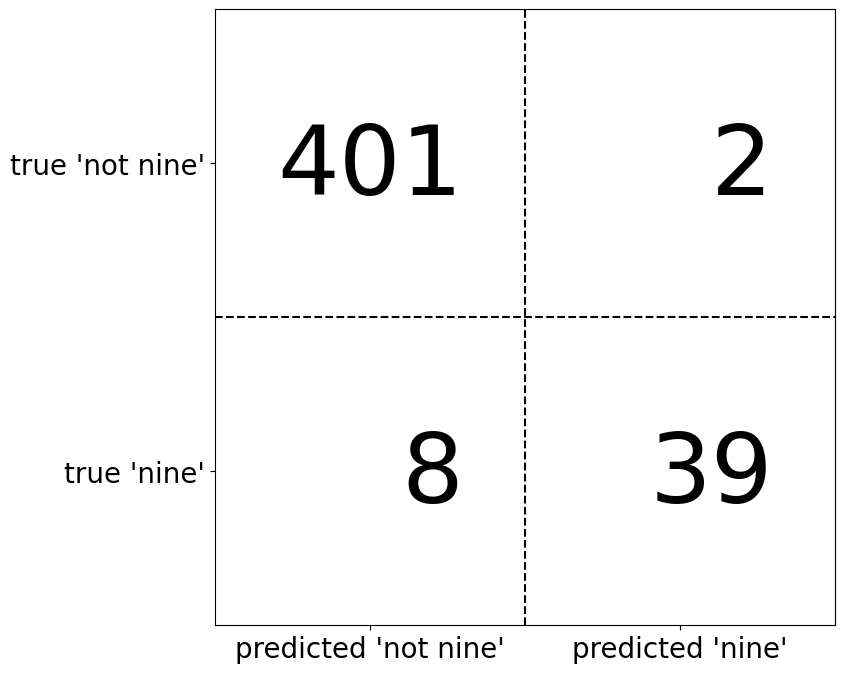

In [99]:
mglearn.plots.plot_confusion_matrix_illustration()

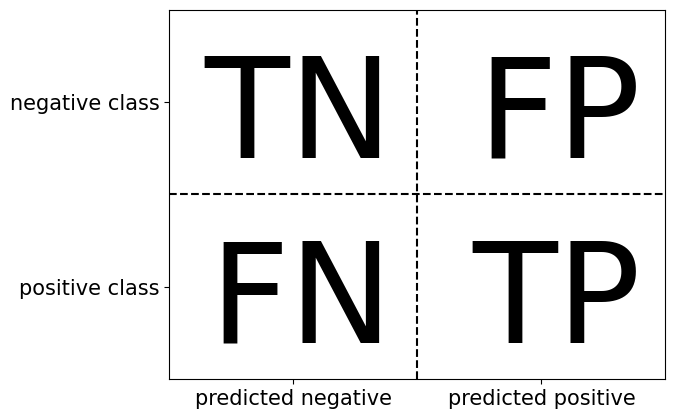

In [100]:
mglearn.plots.plot_binary_confusion_matrix()

In [113]:
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

In [114]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='porog 0', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='krivaya tochnosti polnoty')
plt.xlabel("tochnost")
plt.ylabel("Polnota")
plt.legend(loc='best')

ValueError: multiclass format is not supported

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test,rf.predict_proba(X_test)[:,1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="threshold zero svc", fillstyle='none', c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

ValueError: multiclass format is not supported

In [119]:
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)


rf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
svc = SVC(gamma=0.05).fit(X_train, y_train)

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

ap_rf = average_precision_score(y_test_bin, rf.predict_proba(X_test), average='micro')
ap_svc = average_precision_score(y_test_bin, svc.decision_function(X_test), average='micro')

print("Mid accuracy Random Forest:", ap_rf)
print("Mid accuracy SVC:", ap_svc)


Mid accuracy Random Forest: 0.9768649473353052
Mid accuracy SVC: 0.1816738677639226


<h1>Метрики регрессии</h1>

In [124]:
from sklearn.svm import SVC
print("Метрика качества по умолчанию: {}f".format(cross_val_score(SVC(), digits.data, digits.target == 9)))
 # значение параметра scoring="accuracy" не меняет результатов
explicit_accuracy = cross_val_score(SVC(), digits.data, digits. target == 9, scoring="accuracy")

print("Метрика качества явно заданная правильность: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits. target == 9, scoring="roc_auc")
print("Метрика качества AUC: {}".format(roc_auc))

Метрика качества по умолчанию: [0.975      0.99166667 1.         0.99442897 0.98050139]f
Метрика качества явно заданная правильность: [0.975      0.99166667 1.         0.99442897 0.98050139]
Метрика качества AUC: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [126]:
from sklearn.metrics import roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits. target == 9, random_state=0)
# задаем не самую удачную сетку параметров для иллюстрации:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# используем метрику по умолчанию, то есть правильность:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Решетчатый поиск с использованием правильности")
print ("Наилучшие параметры:", grid.best_params_)
print("Наилучшее значение перекр проверки (правильность)): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}". format(grid.score(X_test, y_test)))

Решетчатый поиск с использованием правильности
Наилучшие параметры: {'gamma': 0.0001}
Наилучшее значение перекр проверки (правильность)): 0.976
AUC на тестовом наборе: 0.992
Правильность на тестовом наборе: 0.973


In [128]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("Решетчатый поиск с использованием AUC")
print("Наилучшие параметры:", grid.best_params_)
print("Наилучшие значение перекрестной проверки (AUC):",grid.best_score_)
print("AUC на тестовом наборе:",roc_auc_score(y_test, grid.decision_function(X_test)))
print("Правильность на тестовом наборе:",grid.score(X_test, y_test))




Решетчатый поиск с использованием AUC
Наилучшие параметры: {'gamma': 0.01}
Наилучшие значение перекрестной проверки (AUC): 0.997999457969529
AUC на тестовом наборе: 0.999524840293543
Правильность на тестовом наборе: 0.999524840293543


In [ ]:
# import csv
# from random import randint, choice
#
# with open('lab6_dataset.csv', 'w', newline='') as csvfile:
#     # Создаем объект writer
#     writer = csv.writer(csvfile)
#
#     writer.writerow(['name', 'second_name', 'salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])
#

#     for _ in range(1000):
#         name = choice(['Ernaz', 'Azilya', 'Altai', 'Askat', 'Akyl', 'Gulmira', 'Dzhamilya', 'Erkinbek', 'Nazira', 'Dzhumagul', 'Timur', 'Diana', 'Nuraiym', 'Dzhazgul', 'Altynai', 'Rayana', 'Jusup', 'Aktan', 'Temirlan', 'Meder', 'Nurdin', 'Kirill', 'Karina', 'Dastan', 'Bayastan', 'Osmonkul'])
#         second_name = choice(['Erkinbekov(a)', 'Adylgaziev(a)', 'Stamov(a)', 'Saparov(a)', 'Asankadyrov(a)', 'Kadyrov(a)', 'Bakytov(a)', 'Kadyrakhunov(a)', 'Abdyrakmanov(a)', 'Tashiev(a)', 'Pratov(a)', 'Maratov(a)','Dzhakshylykov(a)', 'Dzhumashev(a)', 'Akaev(a)', 'Sadyrov(a)'])
#         salary = randint(30000, 70000)
#         city = choice(['Bishkek', 'Moscow', 'London', 'Paris', 'New York', 'Naryn', 'Berlin', 'Hamburg', 'Bayern', 'Los Angeles', 'Miami', 'Rome', 'Milan', 'Napoli', 'Saint-Peterburg', 'Potsdam'])
#         age = randint(30, 65)
#         vacation_prefer = choice(['Shopping', 'Beach holiday', 'Skiing', 'Cultural', 'Adventure', 'Competition', 'Conference'])
#         transport_prefer = choice(['auto', 'plane', 'train', 'ship'])
#         target = choice(['London', 'Moscow', 'New York', 'Paris', 'Dubai'])
#

#         writer.writerow([name, second_name, salary, city, age, vacation_prefer, transport_prefer, target])


In [151]:
import pandas as pd
data = pd.read_csv('lab6_dataset.csv')
print (data.columns)

Index(['name', 'second_name', 'salary', 'city', 'age', 'vacation_prefer',
       'transport_prefer', 'target'],
      dtype='object')


In [130]:
from sklearn.model_selection import train_test_split

df = pd.DataFrame(data)

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape, y_train.shape)
print("Размер тестовой выборки:", X_test.shape, y_test.shape)

Размер обучающей выборки: (800, 7) (800,)
Размер тестовой выборки: (200, 7) (200,)


In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv('lab6_dataset.csv')

X = data[['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer']]
y = data['target']

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Точность: {accuracy}')
print(classification_report(y_test, y_pred))

Точность: 0.19
              precision    recall  f1-score   support

       Dubai       0.19      0.26      0.22        39
      London       0.28      0.34      0.31        38
      Moscow       0.12      0.10      0.11        41
    New York       0.15      0.15      0.15        39
       Paris       0.17      0.12      0.14        43

    accuracy                           0.19       200
   macro avg       0.18      0.19      0.19       200
weighted avg       0.18      0.19      0.18       200



In [160]:
all_predictions = clf.predict(X)

df['predicted_target'] = all_predictions

city_counts = df['predicted_target'].groupby(df['city']).value_counts()
most_preferred_city = city_counts.groupby(level=0).idxmax().apply(lambda x: x[1]).idxmax()

print(f"Город, в котором предпочитают провести отпуск чаще всего: {most_preferred_city}")


Город, в котором предпочитают провести отпуск чаще всего: New York
